## DBSCAN Density-based spatial clustering of applications with noise

Article on DBSCAN will be released on Anime Vyuh-Eksauek Machine Learning series

Clustering is a part of Unsupervised Learning and the models learns the pattern to predict the label. In case of KMeans and Hierarchical clustering algorithms, it may be possible that one of the label is accidently created because of Noise or Outliers. 

K-Means and Hierarchical Clustering both fail in creating clusters of arbitrary shapes. They are not able to form clusters based on varying densities. Here is where we need DBSCAN clustering.

Two important arguments"
- `eps`: Epsilon is the radius of the circle to be created around each data point to check the density
- `min_samples`: minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

For more information check out blog post: [DBSCAN Clustering] [soon...]

#### Import the libraies

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [34]:
X, y = make_blobs(n_samples=5000)
df=pd.DataFrame(X,y)

In [35]:
df

,0,1
1,-7.107301,-10.043961
0,5.567055,-5.218811
1,-7.497182,-8.088500
2,7.011841,8.454310
1,-6.126997,-9.325595
...,...,...
1,-7.380669,-7.872227
0,4.724233,-3.983411
1,-7.860214,-7.543599
1,-7.493957,-8.524742


In [36]:
df=df.rename(columns={0: "feat1", 1:"feat2"})
df.head(10)

,feat1,feat2
1,-7.107301,-10.043961
0,5.567055,-5.218811
1,-7.497182,-8.088500
2,7.011841,8.454310
1,-6.126997,-9.325595
0,5.367431,-5.512840
2,5.768589,8.110907
2,5.818473,7.703965
0,3.780553,-5.271861
1,-4.815159,-10.328013


In [37]:
X.shape

(5000, 2)

In [38]:
y.shape

(5000,)

In [39]:
set(y)

{0, 1, 2}

Text(0, 0.5, 'Feature2')

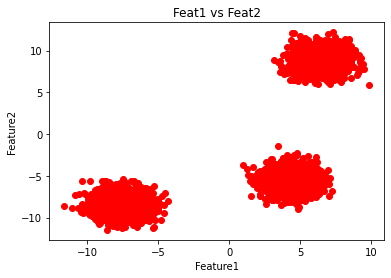

In [40]:
plt.scatter(X[:, 0], X[:, 1],color="red")
plt.title("Feat1 vs Feat2")
plt.xlabel("Feature1")
plt.ylabel("Feature2")

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
model = DBSCAN(eps=0.8, min_samples=8, metric='euclidean').fit(X_train)

- Eps, ε - distance
- MinPts – Minimum number of points within distance Eps

Text(0, 0.5, 'Feature2')

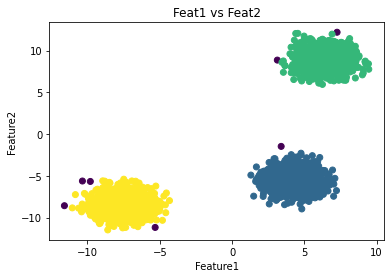

In [43]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=model.labels_, label=y)
plt.title("Feat1 vs Feat2")
plt.xlabel("Feature1")
plt.ylabel("Feature2")

In [44]:
labels= model.labels_

no_of_clusters =len(set(labels))-(1 if -1 in labels else 0)
print("Estimated no. of clusters:",no_of_clusters)

# Identify Noise
noise = list(model.labels_).count(-1)
print("Estimated no. of noise points:",noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 7


### Evaluation Metrics: Clustering Algorithms:

Silhouette score is in the range of -1 to 1. A score near 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

Absolute Rand Score is in the range of 0 to 1. More than 0.9 denotes excellent cluster recovery, above 0.8 is a good recovery. Less than 0.5 is considered to be poor recovery. 

In [47]:
sc = silhouette_score(X_train,labels)
print("Silhouette Score:",sc)
ars = adjusted_rand_score(y_train,labels)
print("Adjusted Rand Score:",ars)

Silhouette Score: 0.851930775085957
Adjusted Rand Score: 0.9973644916294088


### Applications Of Clustering

- Recommendation Engine
- Customer Segementation [Used in Amazon, Netflix, Spotify and so on..]
- Image Segmentation
- Market Segmentation

#### Reference:
- [How DBSCAN Works?](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)
- [DBSCAN In Sklearn](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)